In [1]:
import networkx as nx
G=nx.Graph()

In [2]:
G.add_node(1)

In [3]:
G.add_nodes_from([2,3])

In [4]:
H=nx.path_graph(10)
G.add_nodes_from(H)

In [5]:
G.add_node(H)

In [7]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)

In [8]:
G.add_edges_from([(1,2),(1,3)])

[1, 2, 'spam']
[(1, 2)]


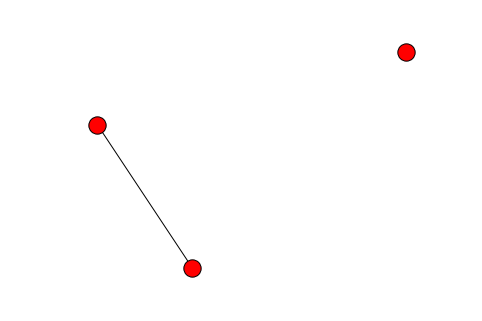

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
G=nx.Graph()
G.add_node("spam")
G.add_edge(1,2)
print(G.nodes())
[1, 2, 'spam']
print(G.edges())
[(1, 2)]
nx.draw(G)

Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges


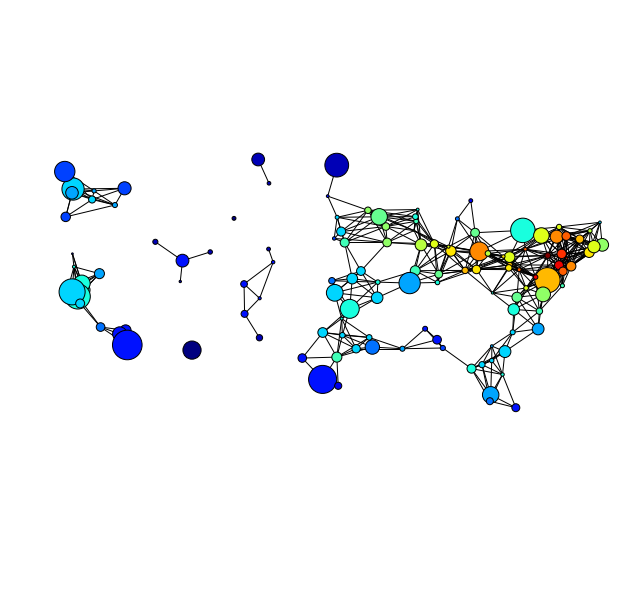

In [10]:
#!/usr/bin/env python
"""
An example using networkx.Graph().

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt. The cities each have location and population
data.  The edges are labeled with the distance betwen the two cities.

This example is described in Section 1.1 in Knuth's book [1,2].

References.
-----------

[1] Donald E. Knuth,
    "The Stanford GraphBase: A Platform for Combinatorial Computing",
    ACM Press, New York, 1993.
[2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html


"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2015 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx


def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    import gzip
    fh = gzip.open('knuth_miles.txt.gz','r')

    G=nx.Graph()
    G.position={}
    G.population={}

    cities=[]
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"): # skip comments
            continue

        numfind=re.compile("^\d+")

        if numfind.match(line): # this line is distances
            dist=line.split()
            for d in dist:
                G.add_edge(city,cities[i],weight=int(d))
                i=i+1
        else: # this line is a city, position, population
            i=1
            (city,coordpop)=line.split("[")
            cities.insert(0,city)
            (coord,pop)=coordpop.split("]")
            (y,x)=coord.split(",")

            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city]=(-int(x)+7500,int(y)-3000)
            G.population[city]=float(pop)/1000.0
    return G

if __name__ == '__main__':
    import networkx as nx
    import re
    import sys

    G=miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges"\
          %(nx.number_of_nodes(G),nx.number_of_edges(G)))


    # make new graph of cites, edge if less then 300 miles between them
    H=nx.Graph()
    for v in G:
        H.add_node(v)
    for (u,v,d) in G.edges(data=True):
        if d['weight'] < 300:
            H.add_edge(u,v)

    # draw with matplotlib/pylab

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8,8))
        # with nodes colored by degree sized by population
        node_color=[float(H.degree(v)) for v in H]
        nx.draw(H,G.position,
             node_size=[G.population[v] for v in H],
             node_color=node_color,
             with_labels=False)

        # scale the axes equally
        plt.xlim(-5000,500)
        plt.ylim(-2000,3500)

        plt.savefig("knuth_miles.png")
    except:
        pass